# Mermaid-Diagramme in Jupyter Notebooks

## Beispiel eines Mermaid-Diagramms

```
graph TD;
    A[Start] --> B{Entscheidung};
    B -->|Ja| C[Aktion 1];
    B -->|Nein| D[Aktion 2];
    C --> E[Ende];
    D --> E;
```

TODO: Kann ich als Markdown schreiben und irgendwie direkt im Jupyter Notebook rendern?

## Mermaid in Jupyter rendern per *mermaid.ink*
Erklärung und Konfiguration, siehe https://mermaid.ink/

<font color="red">Fazit: Die erzeugten SVGs sind oft irgendwo abgeschnitten; die PNGs sind sehr unscharf.</font> Also:
- Immer mal wieder ausprobieren, ob es besser geworden ist.
- Auf `mermaid.live` kommen seltsamerweise die Diagramme immer scharf raus - sobald man sie aber exportieren will, hat man die gleiche schlechte Qualität wie bei `mermaid.ink`.
- Und: Man kann so einen ganz netten handdrawn-Effekt erzielen durch einen Button, für den es aber in mermaid.ink keine Option gibt. Also: `mermaid.live` nutzen, dort den Button aktivieren und dann das Diagramm teilen: [Hier der Link zu einem hübschen Flowchart](https://mermaid.live/edit#pako:eNqFkctOwzAQRX_Fmk1b4UZJSZuHAAlRECyQkNoVcRcmcdNIiR05jkqJ8u84Tvpiwyw89szV9RlNA7FIGISwzcU-3lGp0HpJONKxUvo1jkzaTPraG89UVJW0QPfI3vS1JYuzKhO8IWA6d2hOoO17HzLjKiJQdnk8emV5LjDaC5kn1mhCYHO0jSUrmJEO7ibdIOekeayrlH6xk1knODs882Qc6aMDvcBH0-mDgT7jm9KR-XoC3UJrWTMjMegXUwxWA-gf7n9MX2he9a7DFFcjmYZmBwwFkwXNEr2PppMQUDvtTyDU162QrFIECG-1ktZKrA48hlBpYgx1mVDFlhlNJS0g3HY_YmBJpoR871dsNo2hpBzCBr4hdGa25S6Che35_swO5n6A4QCh61jBref6jmvr8O1Fi-FHCO1qW743ty_CwSBFne6OFNr70yj7Zyq7WQYWyXjC5JOouYIw8NpfKFjC6w).


Aus der Mermaid-Definition:

flowchart TD
    Start([Start])
(...) wird die folgende URL generiert:
https://mermaid.ink/svg/CmZsb3djaGFydCBURAogICAgU3RhcnQoW1N0YXJ0XSkKICAgIERlY2lzaW9ueyJzcGFtIDwgNSJ9CiAgICBQcmludFsicHJpbnQoJ0hlbGxvLCB3b3JsZC4nKSJdCiAgICBJbmNyZW1lbnRbInNwYW0gPSBzcGFtICsgMSJdCiAgICBBdXNnYWJlWyJwcmludChzcGFtKSJdCiAgICBFbmQoW0VuZF0pCgogICAgU3RhcnQgLS0-IERlY2lzaW9uCiAgICBEZWNpc2lvbiAtLSBUcnVlIC0tPiBQcmludAogICAgUHJpbnQgLS0-IEluY3JlbWVudAogICAgSW5jcmVtZW50IC0tPiBEZWNpc2lvbgogICAgRGVjaXNpb24gLS0gRmFsc2UgLS0-IEF1c2dhYmUKICAgIEF1c2dhYmUgLS0-IEVuZAo=?theme=forest&width=300
Das gerenderte Diagramm:


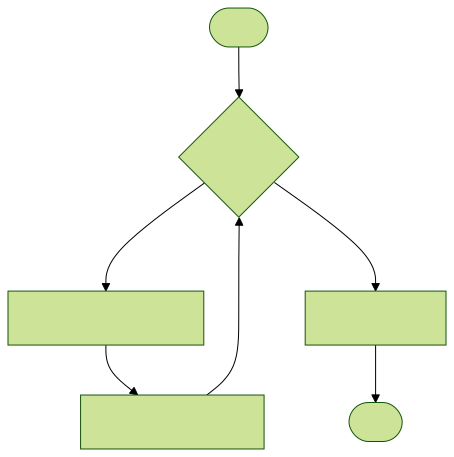

Und der SVG-Code:
<svg xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" id="mermaid-svg" class="flowchart" style="max-width: 100%;" viewBox="0 0 454.3125 457.265625" role="graphics-document document" aria-roledescription="flowchart-v2" width="300px"><style xmlns="http://www.w3.org/1999/xhtml">@import url("https://cdnjs.cloudflare.com/ajax/libs/font-awesome/6.7.2/css/all.min.css");</style><style>#mermaid-svg{font-family:"trebuchet ms",verdana,arial,sans-serif;font-size:16px;fill:#000000;}@keyframes edge-animation-frame{from{stroke-dashoffset:0;}}@keyframes dash{to{stroke-dashoffset:0;}}#mermaid-svg .edge-animation-slow{stroke-dasharray:9,5!important;stroke-dashoffset:900;animation:dash 50s linear infinite;stroke-linecap:round;}#mermaid-svg .edge-animation-fast{stroke-dasharray:9,5!important;stroke-dashoffset:900;animation:dash 20s linear infinite;stroke-linecap:round;}#mermaid-svg .error-icon{fill:#552222;}#mermaid-svg .error-text{fill:#552222;stroke:#552222

In [78]:
import base64
from IPython.display import Image, display, SVG

themes = "default neutral dark forest".split

def mm(mermaid_str, format="svg", theme="neutral", width=None) -> SVG | Image:
    mermaid_head = "\n".join(mermaid_str.splitlines()[:3])
    print(f"Aus der Mermaid-Definition:\n{mermaid_head}")
    print("(...) wird die folgende URL generiert:")
    graphbytes = mermaid_str.encode("utf8")
    base64_bytes = base64.urlsafe_b64encode(graphbytes)
    base64_string = base64_bytes.decode("ascii")
    route = "svg/" if format == "svg" else "img/"
    url_string = f"https://mermaid.ink/{route}{base64_string}?theme={theme}"
    if width:
        url_string += f"&width={width}"
    print(url_string)
    if format == 'svg':
        svg = SVG(url=url_string)
        return svg
    else:
        url_string += f"&format={format}"
        img = Image(url=url_string)
        return img
    
# Beispielaufruf
mermaid_graph = """graph LR;
    A--> B & C & D;
    B--> A & E;
    C--> A & E;
    D--> A & E;
    E--> B & C & D;
"""

mermaid_klassendiagramm = """
classDiagram
  class Fahrzeug {
    -farbe: String
    -baujahr: int
    -anzahlFahrzeuge: int$

    +kmStand() GZ
    +setzeFarbe(farbe: String)
    +zeigeStatistik() Text$
    +abstrakteMethode()*
  }
"""

mermaid_flussdiagramm = """
flowchart TD
    Start([Start])
    Decision{"spam < 5"}
    Print["print('Hello, world.')"]
    Increment["spam = spam + 1"]
    Ausgabe["print(spam)"]
    End([End])

    Start --> Decision
    Decision -- True --> Print
    Print --> Increment
    Increment --> Decision
    Decision -- False --> Ausgabe
    Ausgabe --> End
"""

selected = mermaid_flussdiagramm

# img = mm(selected, format="svg", theme="forest")
img = mm(selected, format="svg", theme="forest", width=300)
print("Das gerenderte Diagramm:")
display(img)
print("Und der SVG-Code:")

print(img.data)


## Diagramme erstellen im Browser auf mermaidchart.com
Wenn man auf mermaidchart.com geht, kann man die Diagramme direkt im Browser erstellen und bearbeiten. Das ist wohl die kommerzielle Variante von mermaid.ink. Wenn man dort ein svg exportiert, sieht es auch so aus wie man es erwartet.

<img src="figures/Flussdiagramm1 _ Mermaid Chart-2025-07-23-134653.svg" width="400" style="background-color: #f0f0f0; border: 1px solid #ccc; padding: 10px;">